# MICRO CREDIT DEFAULTER PROJECT

## Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes. Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

## Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

## Points to Remember:

There are no null values in the dataset.


There may be some customers with no loan history.


The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.


For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.


You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df =  pd.read_csv("Data file.csv")

In [4]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Exploratory Data Analysis (EDA):

In [5]:
#checking shape
df.shape

(209593, 37)

##### The dataset contain 209593 rows and 37 columns.

In [6]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
#dropping 'Unnamed' as it of no use
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [8]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [10]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

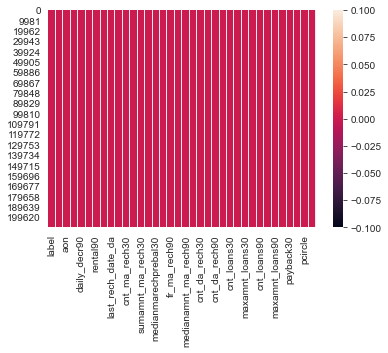

In [11]:
sns.heatmap(df.isnull())

#### NO null values present in dataset

In [12]:
#checking datatypes
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

##### Data set has 3 object data types column.


##### 1.mssidn


##### 2.pcircle


##### 3.pdate

 we will extract the date, month & year from the date column 

In [13]:
df['Year']=pd.DatetimeIndex(df['pdate']).year
df['Month']=pd.DatetimeIndex(df['pdate']).month
df['Day']=pd.DatetimeIndex(df['pdate']).day

We have droped the pdate column as it is of no use now.

In [14]:
df.drop(['pdate'], axis=1,inplace=True)

In [15]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month,Day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22


'msisdn' column as it is mobile no. of the customers and we feel that mobile no. will play no role in predicting fraud cases. So we will drop this column.

In [16]:
df.drop(['msisdn'], axis=1,inplace=True)

In [17]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2.0,12,6,0.0,1.000000,1.000000,UPW,2016,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3.0,18,6,0.0,1.000000,1.000000,UPW,2016,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,6.0,54,12,0.0,4.000000,3.833333,UPW,2016,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,3.0,24,12,0.0,0.000000,10.500000,UPW,2016,7,25


# Statistical Summary

In [18]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,2016.0,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2016.0,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,2016.0,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,2016.0,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,2016.0,8.000000,31.00000


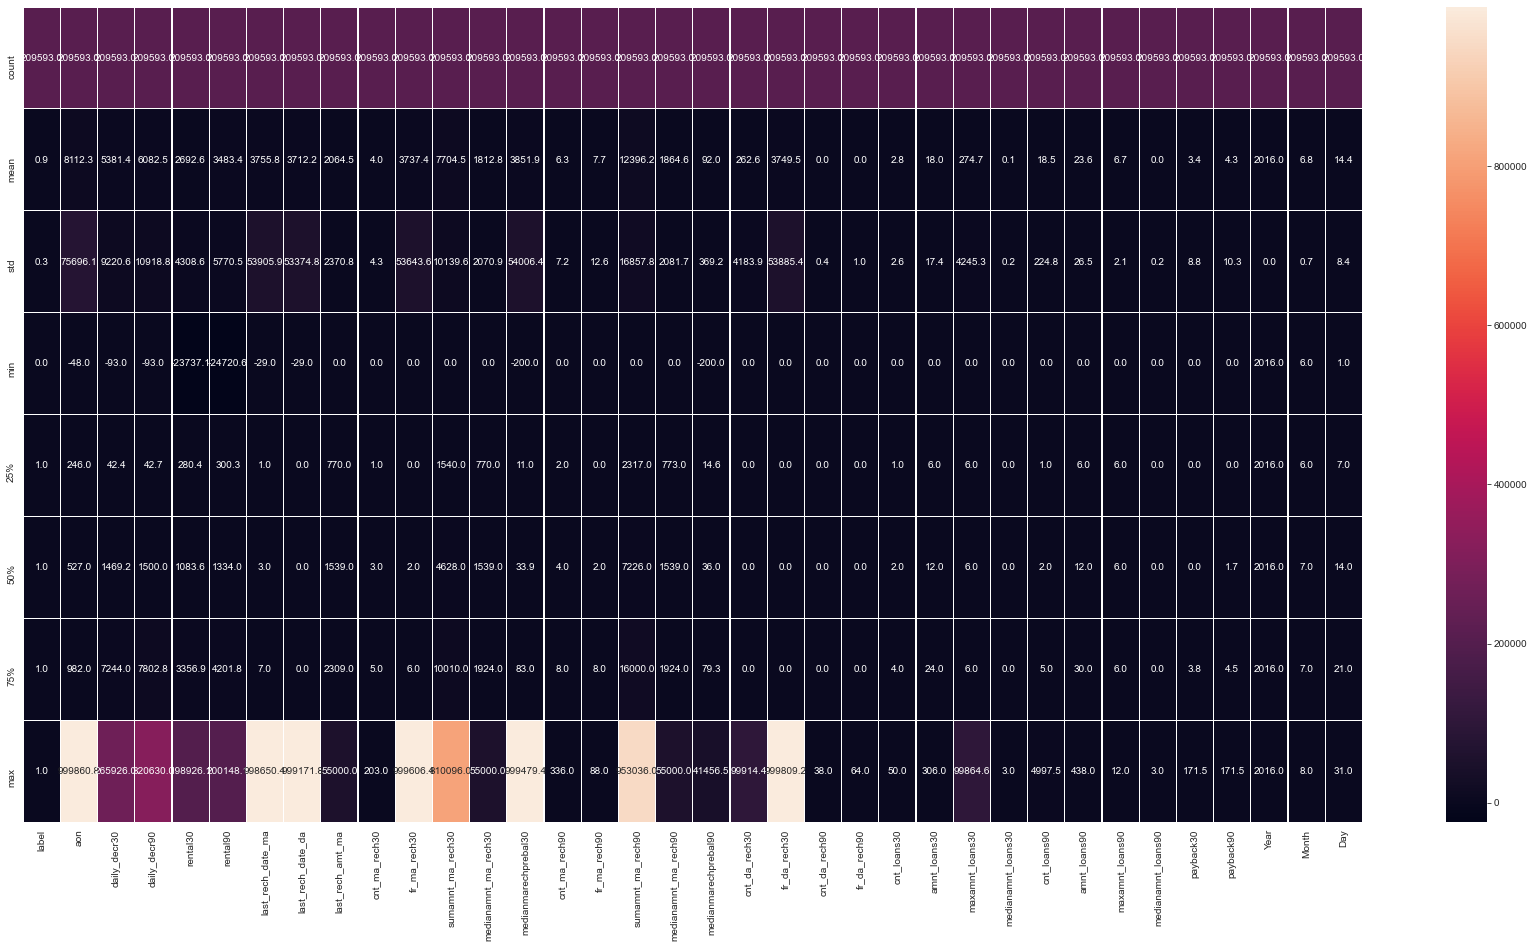

In [19]:
plt.figure(figsize=(30,15))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Analyzing the Target variable

In [20]:
df['label'].unique()

array([0, 1], dtype=int64)

In [21]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

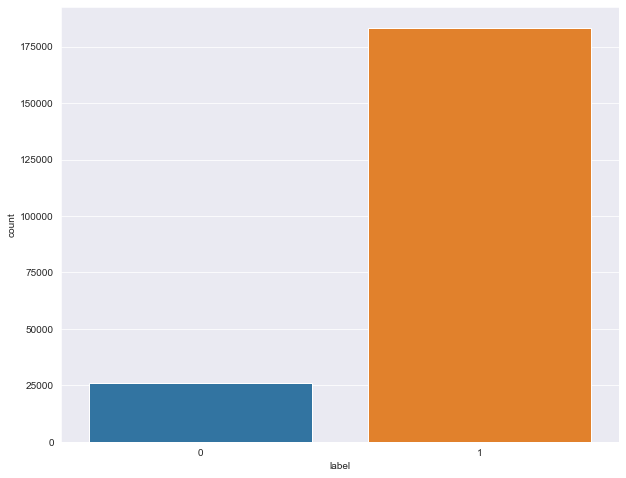

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(df['label'])
plt.show()

# Analyzing the Features variables

In [23]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [24]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

'pcircle' column had only 1 unique value UPW . Because it has only 1 unique value thus it's relation with all other feature column and target column would be same, hence we droped the column from data set.

In [25]:
df.drop(['pcircle'], axis=1,inplace=True)

# Data Visualziation:

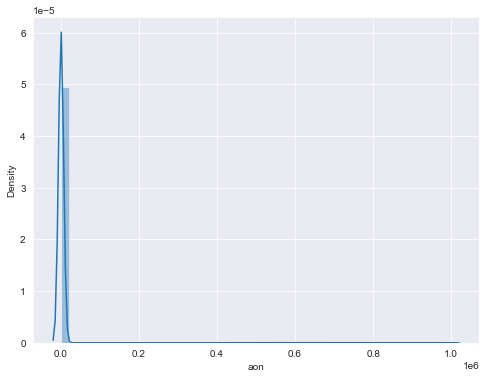

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(df['aon'])
plt.show()

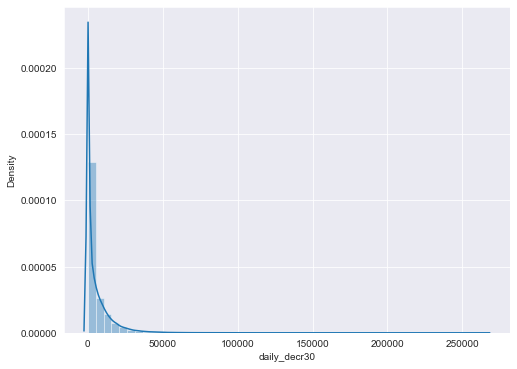

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(df['daily_decr30'])
plt.show()

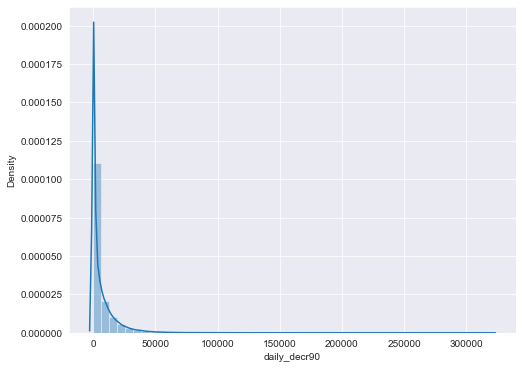

In [28]:
plt.figure(figsize=(8,6))
sns.distplot(df['daily_decr90'])
plt.show()

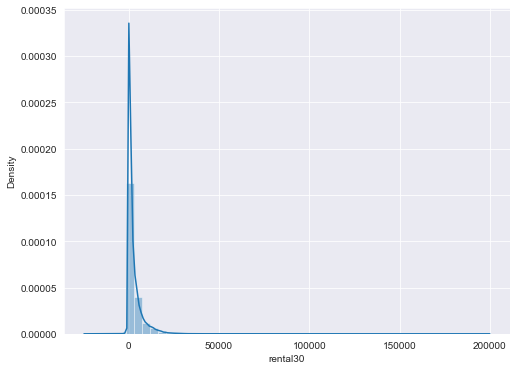

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(df['rental30'])
plt.show()

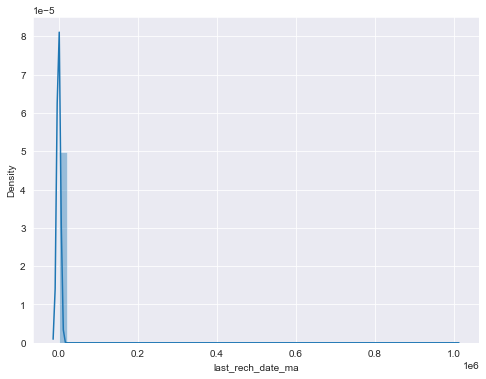

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(df['last_rech_date_ma'])
plt.show()

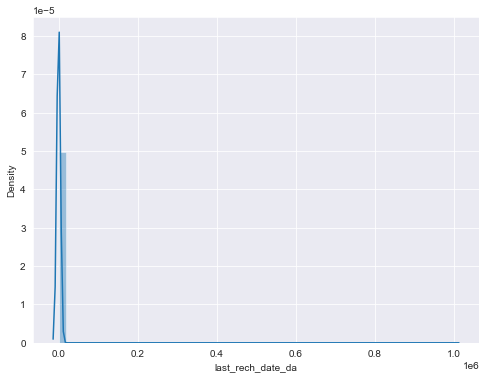

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(df['last_rech_date_da'])
plt.show()

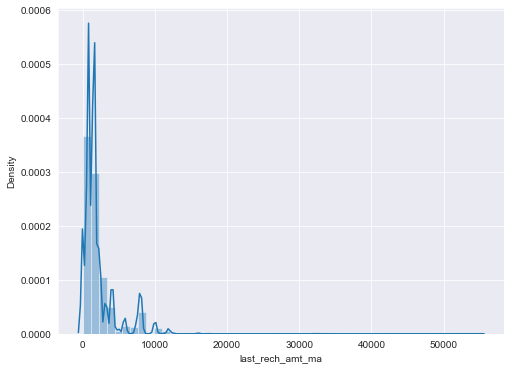

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(df['last_rech_amt_ma'])
plt.show()

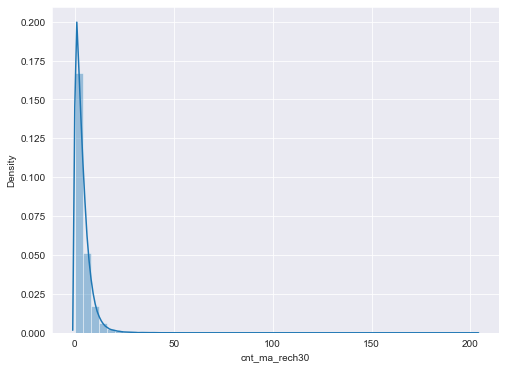

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(df['cnt_ma_rech30'])
plt.show()

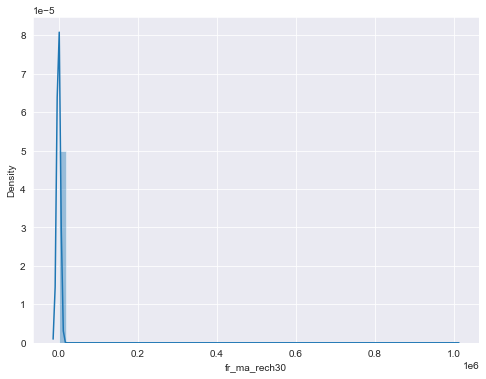

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(df['fr_ma_rech30'])
plt.show()

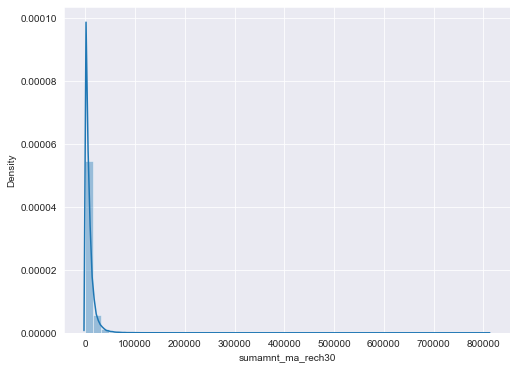

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(df['sumamnt_ma_rech30'])
plt.show()

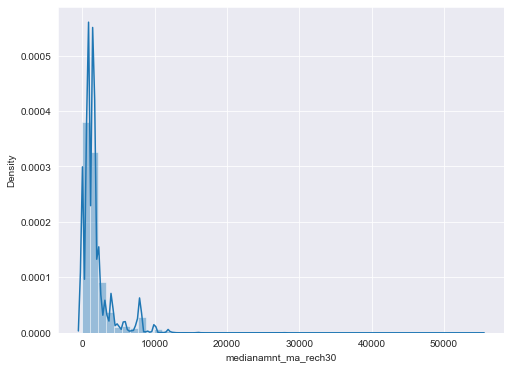

In [36]:
plt.figure(figsize=(8,6))
sns.distplot(df['medianamnt_ma_rech30'])
plt.show()

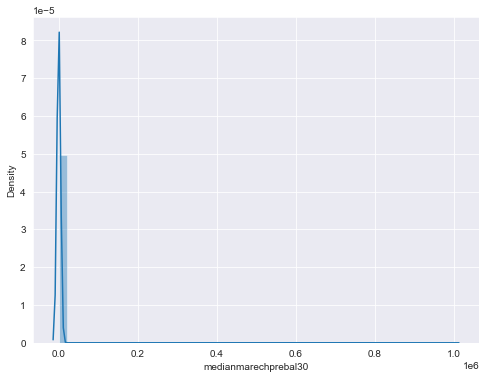

In [37]:
plt.figure(figsize=(8,6))
sns.distplot(df['medianmarechprebal30'])
plt.show()

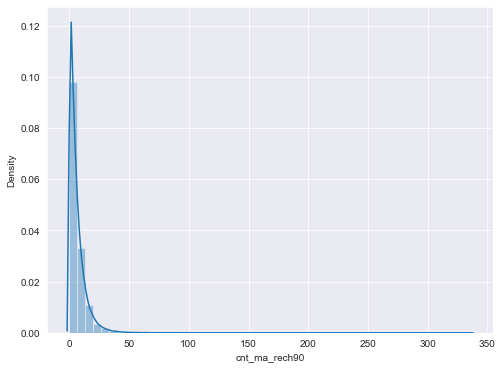

In [38]:
plt.figure(figsize=(8,6))
sns.distplot(df['cnt_ma_rech90'])
plt.show()

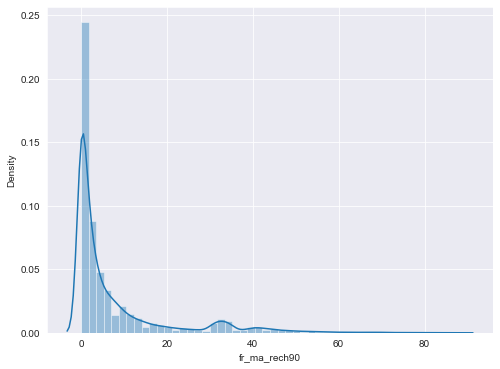

In [39]:
plt.figure(figsize=(8,6))
sns.distplot(df['fr_ma_rech90'])
plt.show()

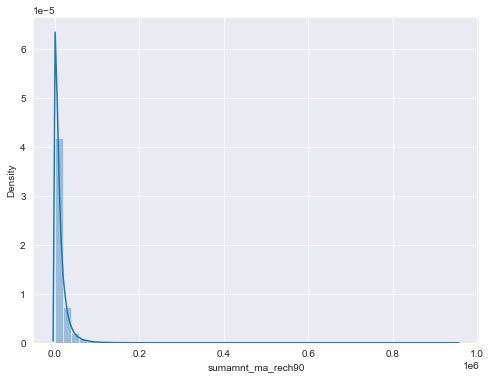

In [40]:
plt.figure(figsize=(8,6))
sns.distplot(df['sumamnt_ma_rech90'])
plt.show()

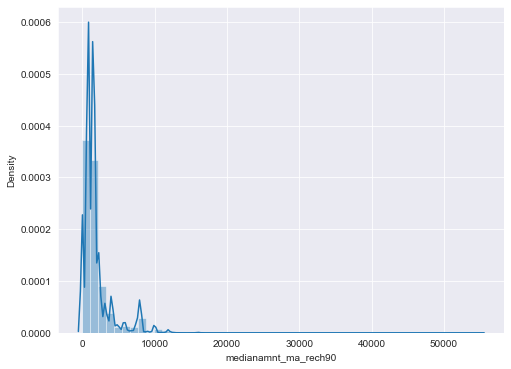

In [41]:
plt.figure(figsize=(8,6))
sns.distplot(df['medianamnt_ma_rech90'])
plt.show()

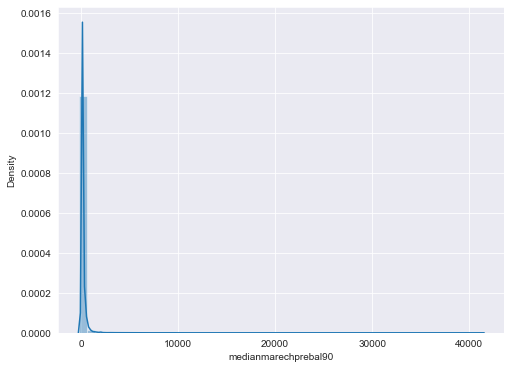

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(df['medianmarechprebal90'])
plt.show()

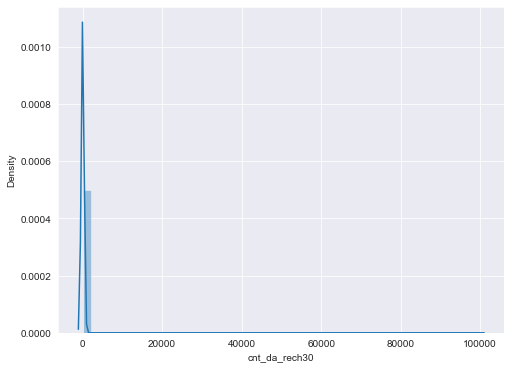

In [43]:
plt.figure(figsize=(8,6))
sns.distplot(df['cnt_da_rech30'])
plt.show()

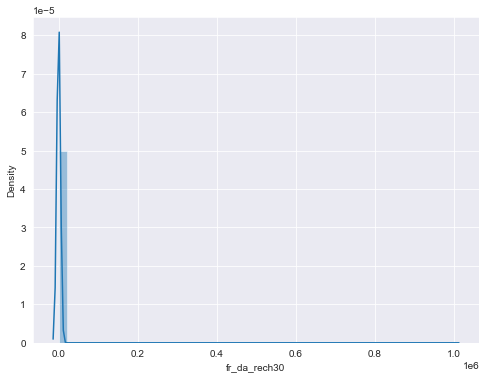

In [44]:
plt.figure(figsize=(8,6))
sns.distplot(df['fr_da_rech30'])
plt.show()

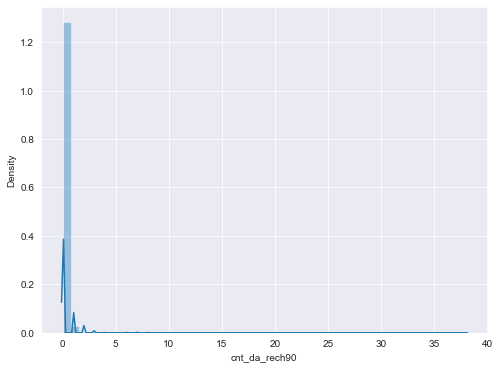

In [45]:
plt.figure(figsize=(8,6))
sns.distplot(df['cnt_da_rech90'])
plt.show()

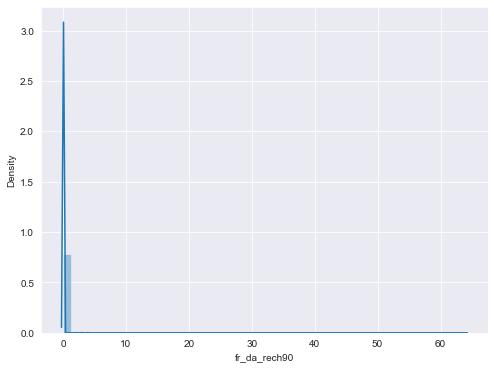

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(df['fr_da_rech90'])
plt.show()

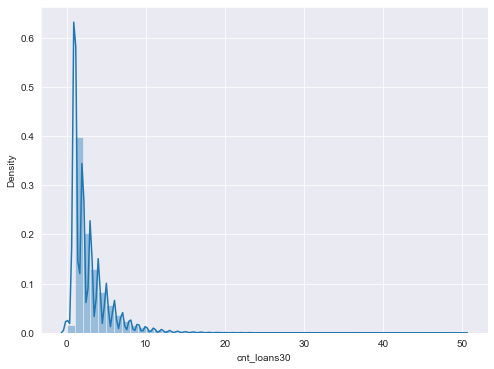

In [47]:
plt.figure(figsize=(8,6))
sns.distplot(df['cnt_loans30'])
plt.show()

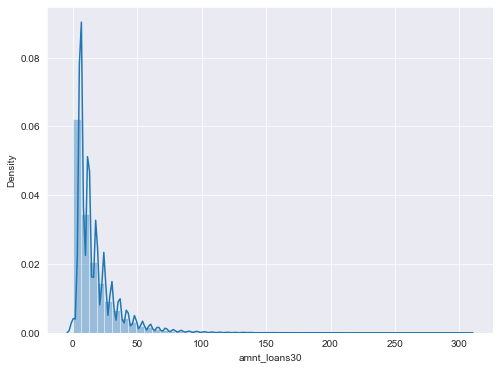

In [48]:
plt.figure(figsize=(8,6))
sns.distplot(df['amnt_loans30'])
plt.show()

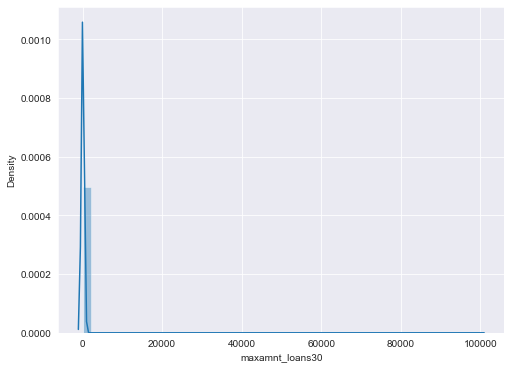

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(df['maxamnt_loans30'])
plt.show()

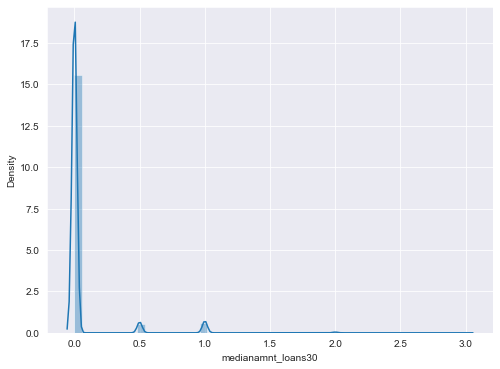

In [50]:
plt.figure(figsize=(8,6))
sns.distplot(df['medianamnt_loans30'])
plt.show()

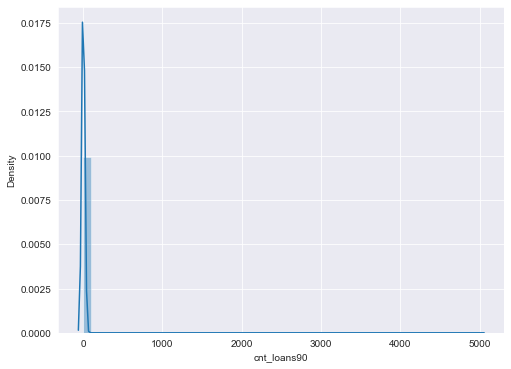

In [51]:
plt.figure(figsize=(8,6))
sns.distplot(df['cnt_loans90'])
plt.show()

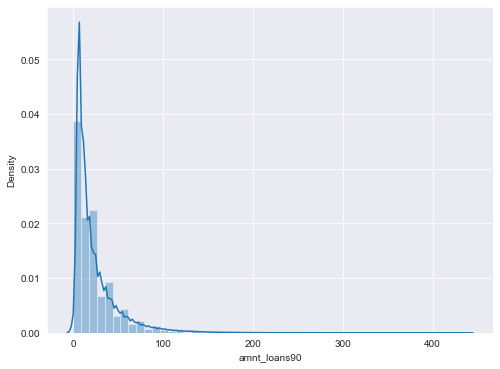

In [52]:
plt.figure(figsize=(8,6))
sns.distplot(df['amnt_loans90'])
plt.show()

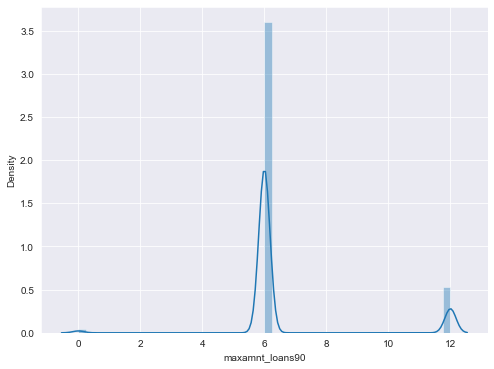

In [53]:
plt.figure(figsize=(8,6))
sns.distplot(df['maxamnt_loans90'])
plt.show()

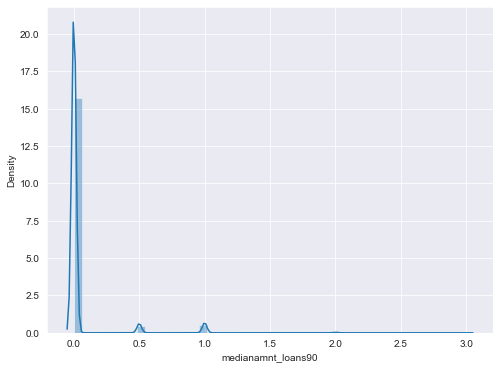

In [54]:
plt.figure(figsize=(8,6))
sns.distplot(df['medianamnt_loans90'])
plt.show()

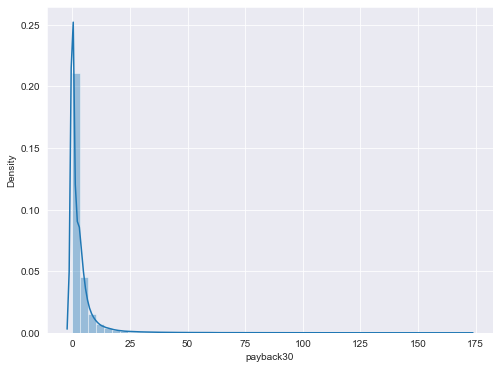

In [55]:
plt.figure(figsize=(8,6))
sns.distplot(df['payback30'])
plt.show()

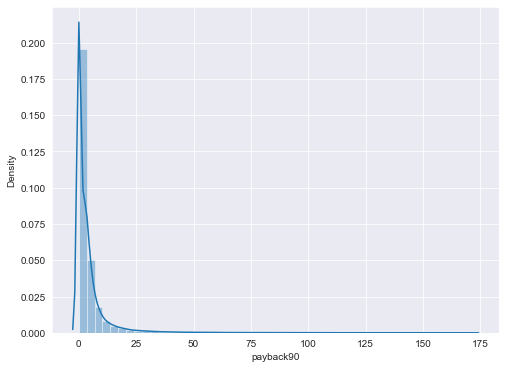

In [56]:
plt.figure(figsize=(8,6))
sns.distplot(df['payback90'])
plt.show()

##### From the above graph,we can see that the distribution of the data in columns are quite complicated. Almost all the columns are heavily right skewed, we found that is because in almost all the column upto 75% & even 100% of the data are distributed in a certain range but there are some data points available in the column which are exceptionaly far-far higher in positive side than the 100% of the data. which is making it heavily right skewed data distribution and this is the only reason why in almost all the columns mean value is smaller than te standard deviation. There are some of the columns also which are even left skewed along with right skeweness like rental30, rental90, maxamnt_loans90.

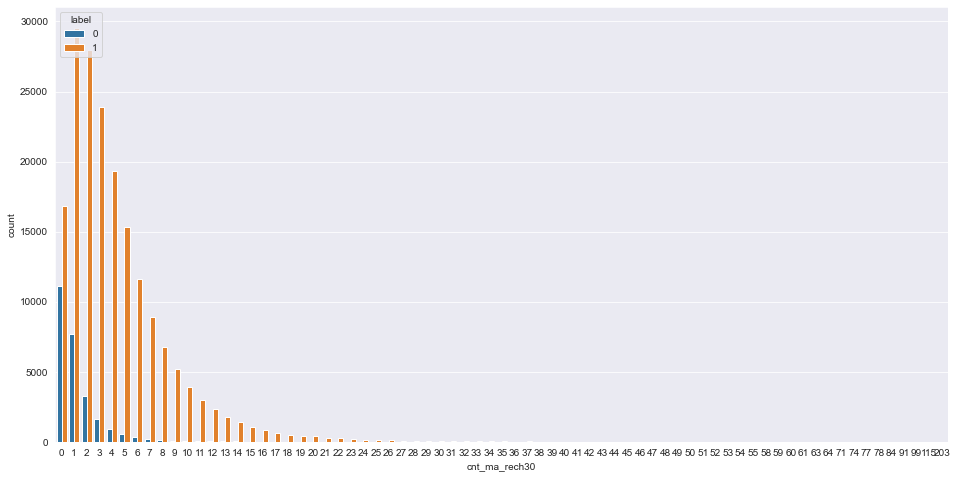

In [57]:
plt.figure(figsize=(16,8))
sns.countplot(df['cnt_ma_rech30'],hue='label',data=df)
plt.show()

This graph shows that the most people reacharge there phone one time in months.

People who recharge there phone 3-5 times in months have also very less tendency be a defaulter.

People who don't recharge their phone in months have very high tendency to be a defaulter.

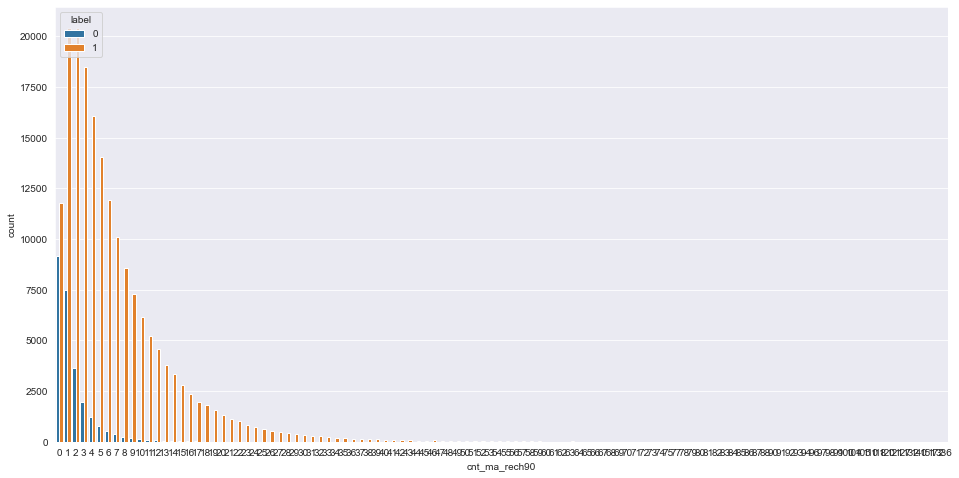

In [58]:
plt.figure(figsize=(16,8))
sns.countplot(df['cnt_ma_rech90'],hue='label',data=df)
plt.show()

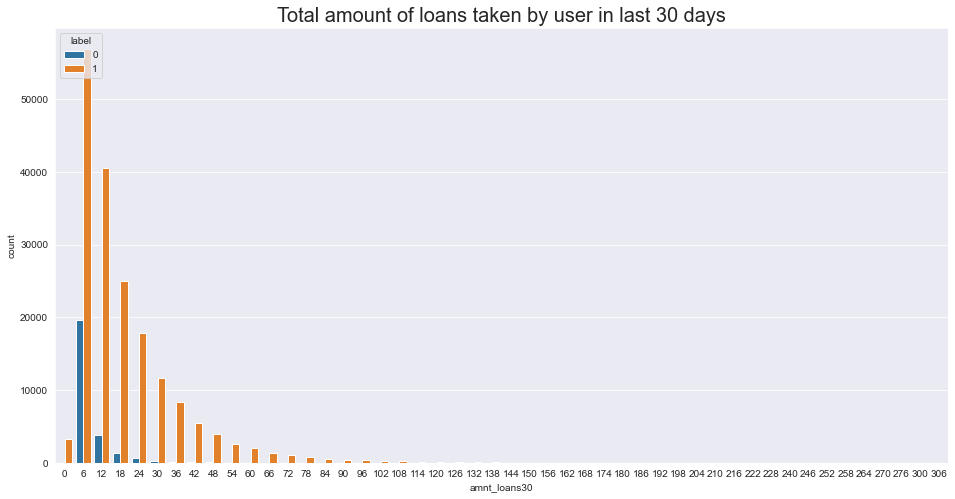

In [59]:
plt.figure(figsize=(16,8))
sns.countplot(df['amnt_loans30'],hue='label',data=df)
plt.title('Total amount of loans taken by user in last 30 days',fontsize=20)
plt.show()

Mostly user recharge took loan of 6(in Indonasian Rupiah).


Gradual drop in loan ruppee after 12 indonaisian Rupiah, People are also have tendency to pay back.

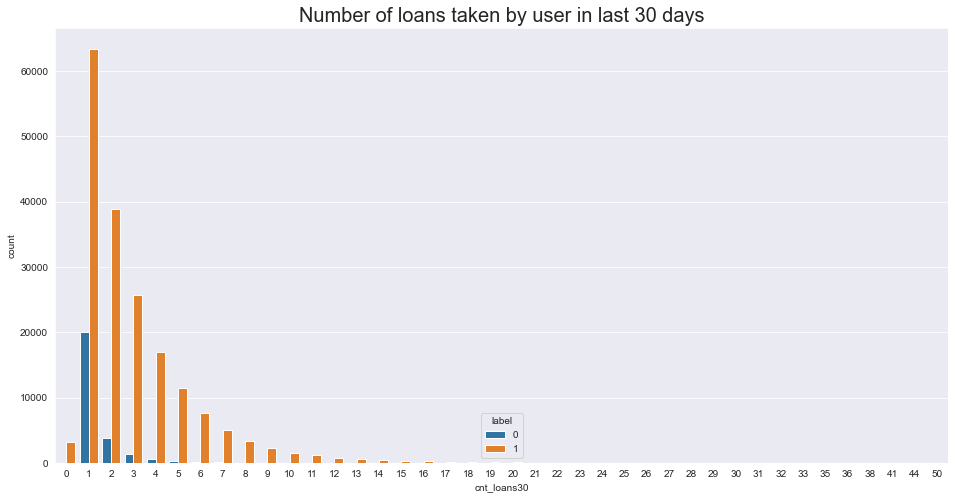

In [60]:
plt.figure(figsize=(16,8))
sns.countplot(df['cnt_loans30'],hue='label',data=df)
plt.title('Number of loans taken by user in last 30 days',fontsize=20)
plt.show()

The trends shows, when number of loan taken by user decreases, it's tendency to be a defaulter is also goes down.

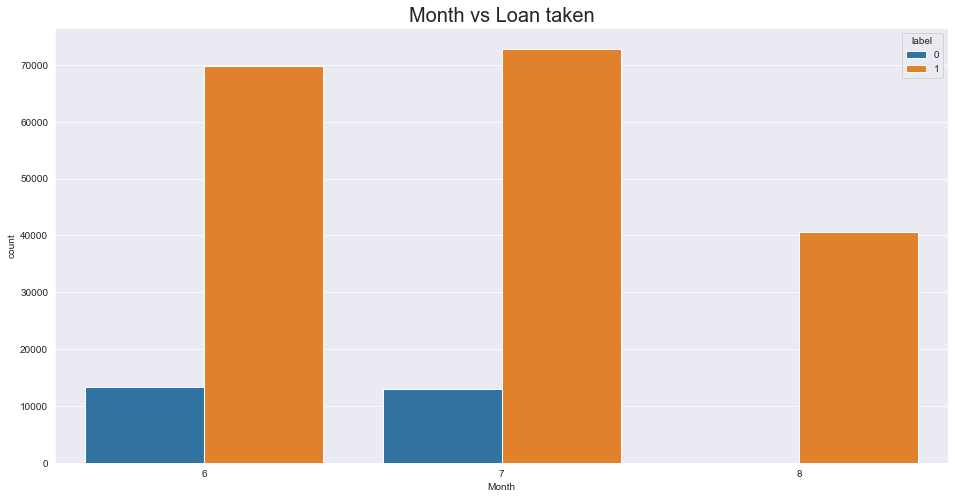

In [61]:
plt.figure(figsize=(16,8))
sns.countplot(df['Month'],hue='label',data=df)
plt.title('Month vs Loan taken',fontsize=20)
plt.show()

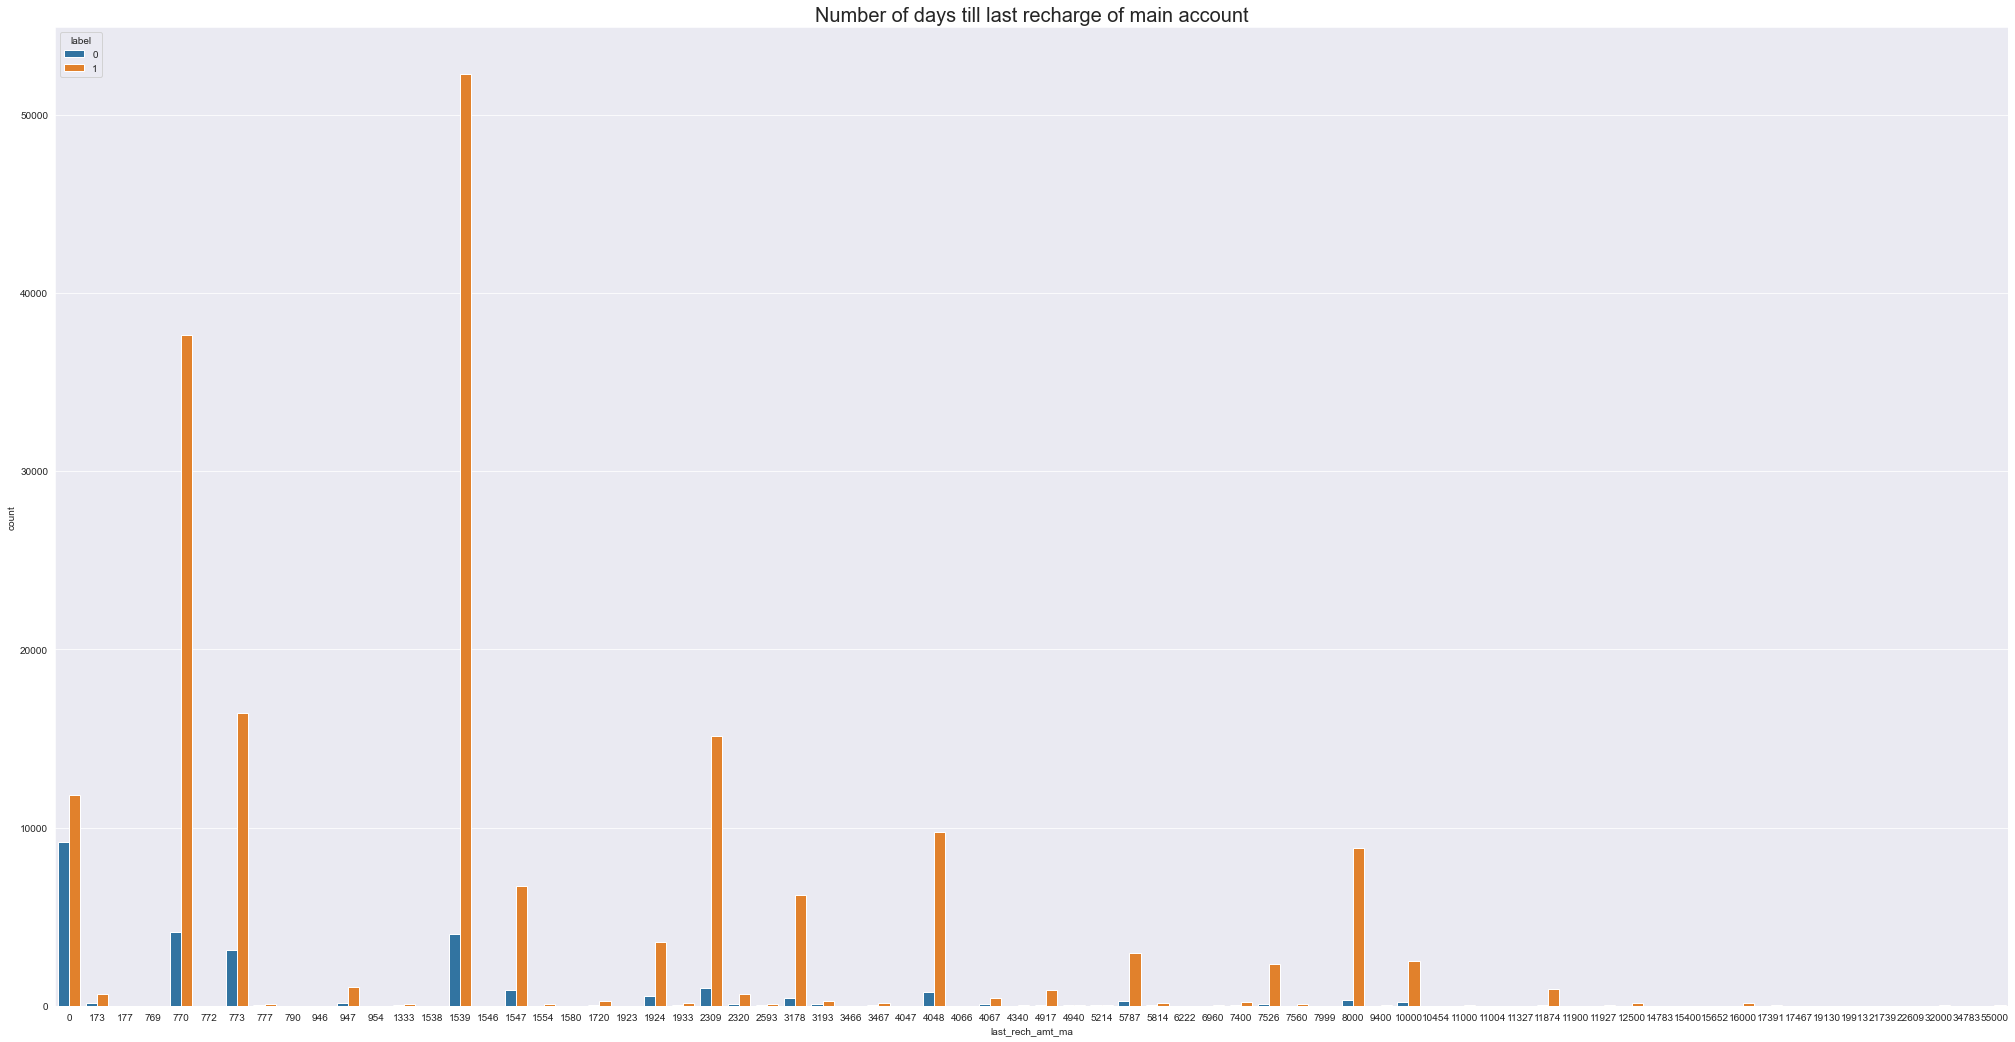

In [62]:
plt.figure(figsize=(35,18))
sns.countplot(df['last_rech_amt_ma'],hue='label',data=df)
plt.title('Number of days till last recharge of main account',fontsize=20)
plt.show()

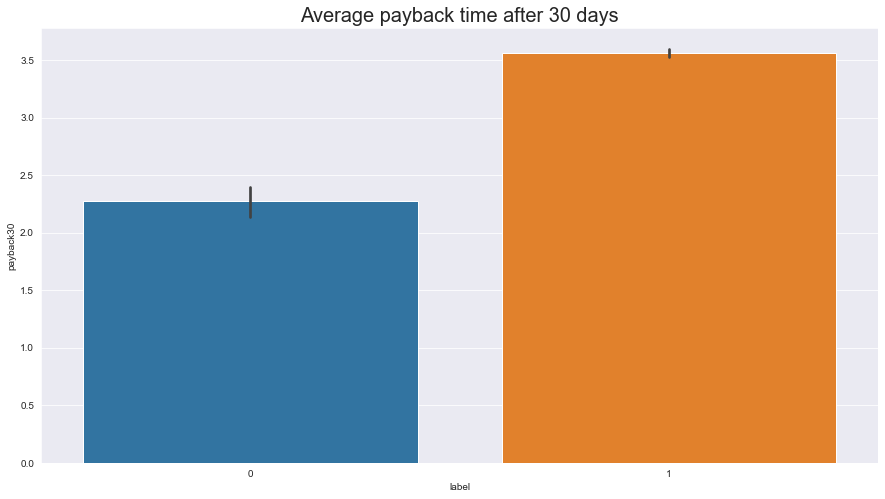

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(y=df['payback30'],x=df['label'],data=df)
plt.title('Average payback time after 30 days',fontsize=20)
plt.show()

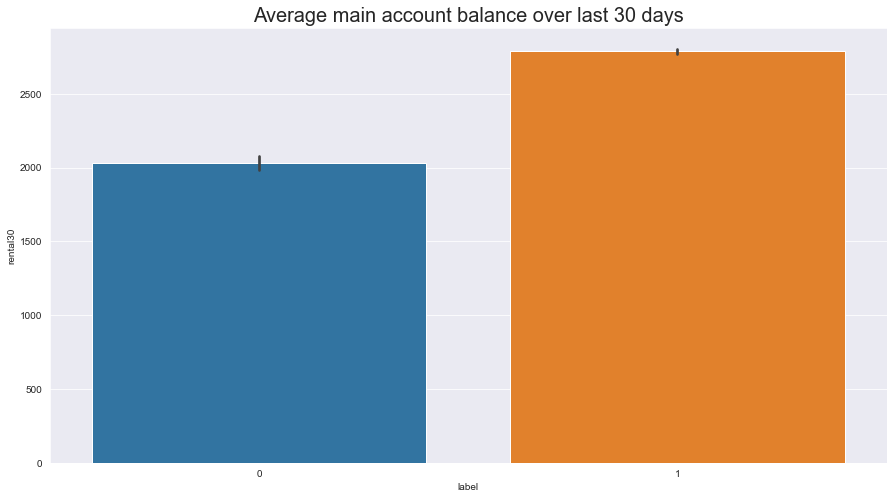

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(y=df['rental30'],x=df['label'],data=df)
plt.title('Average main account balance over last 30 days',fontsize=20)
plt.show()

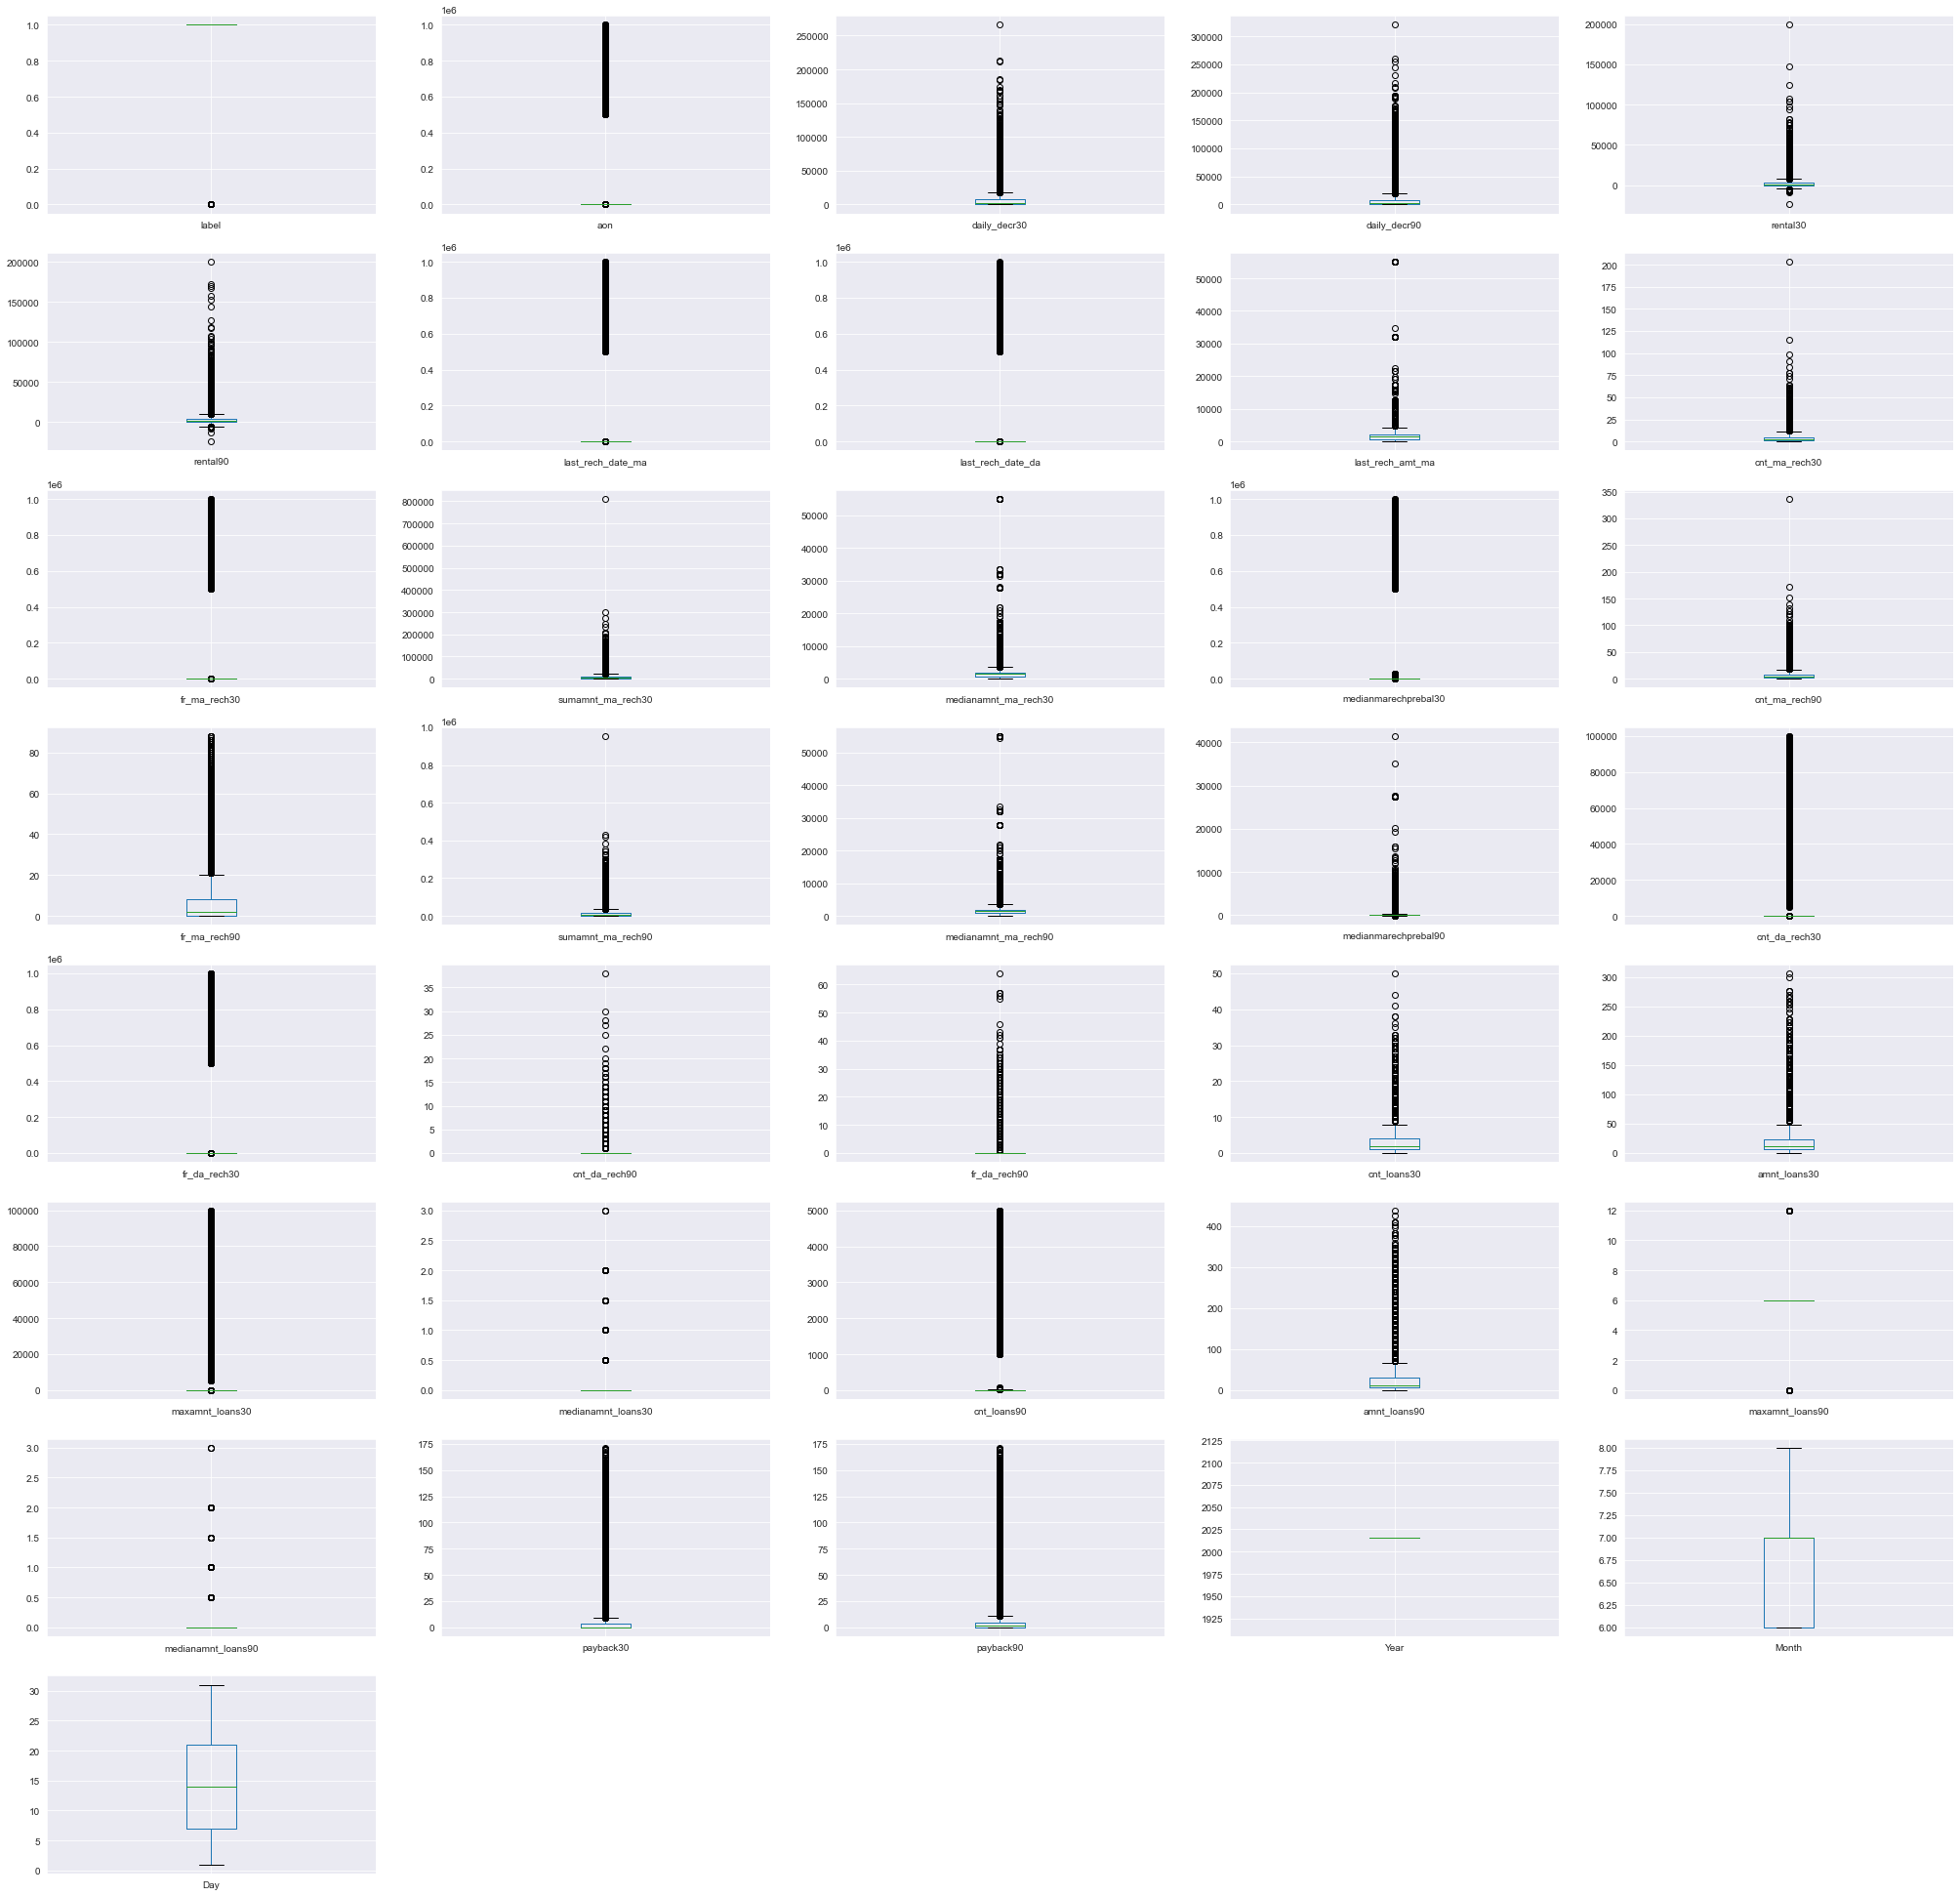

In [65]:
df.plot(kind='box',subplots=True,figsize=(35,35),layout=(8,5))
plt.show()

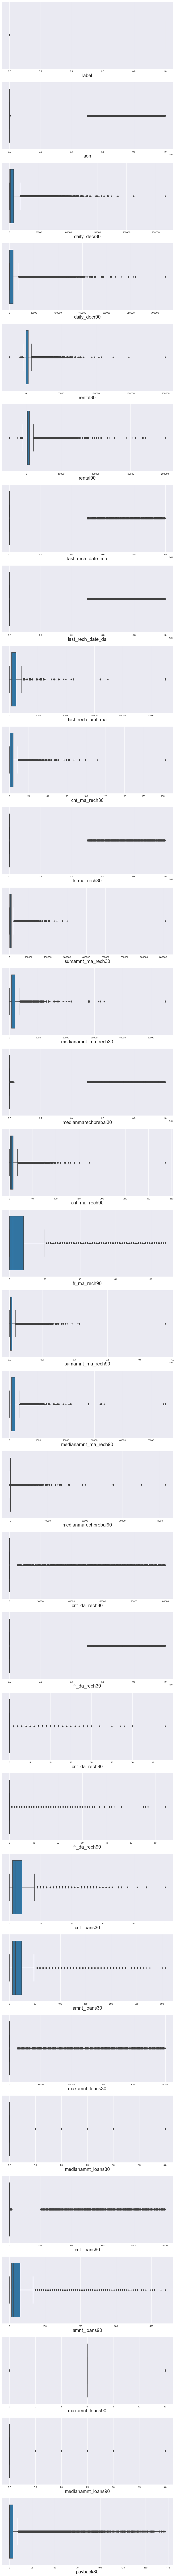

In [66]:
plt.figure(figsize = (13,200))
plotnumber = 1

for columns in df:
    if plotnumber <= 32:
        ax = plt.subplot(32,1, plotnumber)
        sns.boxplot(df[columns])
        plt.xlabel(columns, fontsize = 20)

    plotnumber+=1
plt.show()

# Very high number of outliers are present in our datatset

# Correlation:

In [67]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,NaN,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,NaN,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,NaN,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,NaN,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,NaN,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,NaN,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,NaN,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,NaN,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,NaN,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,NaN,0.156148,0.068643


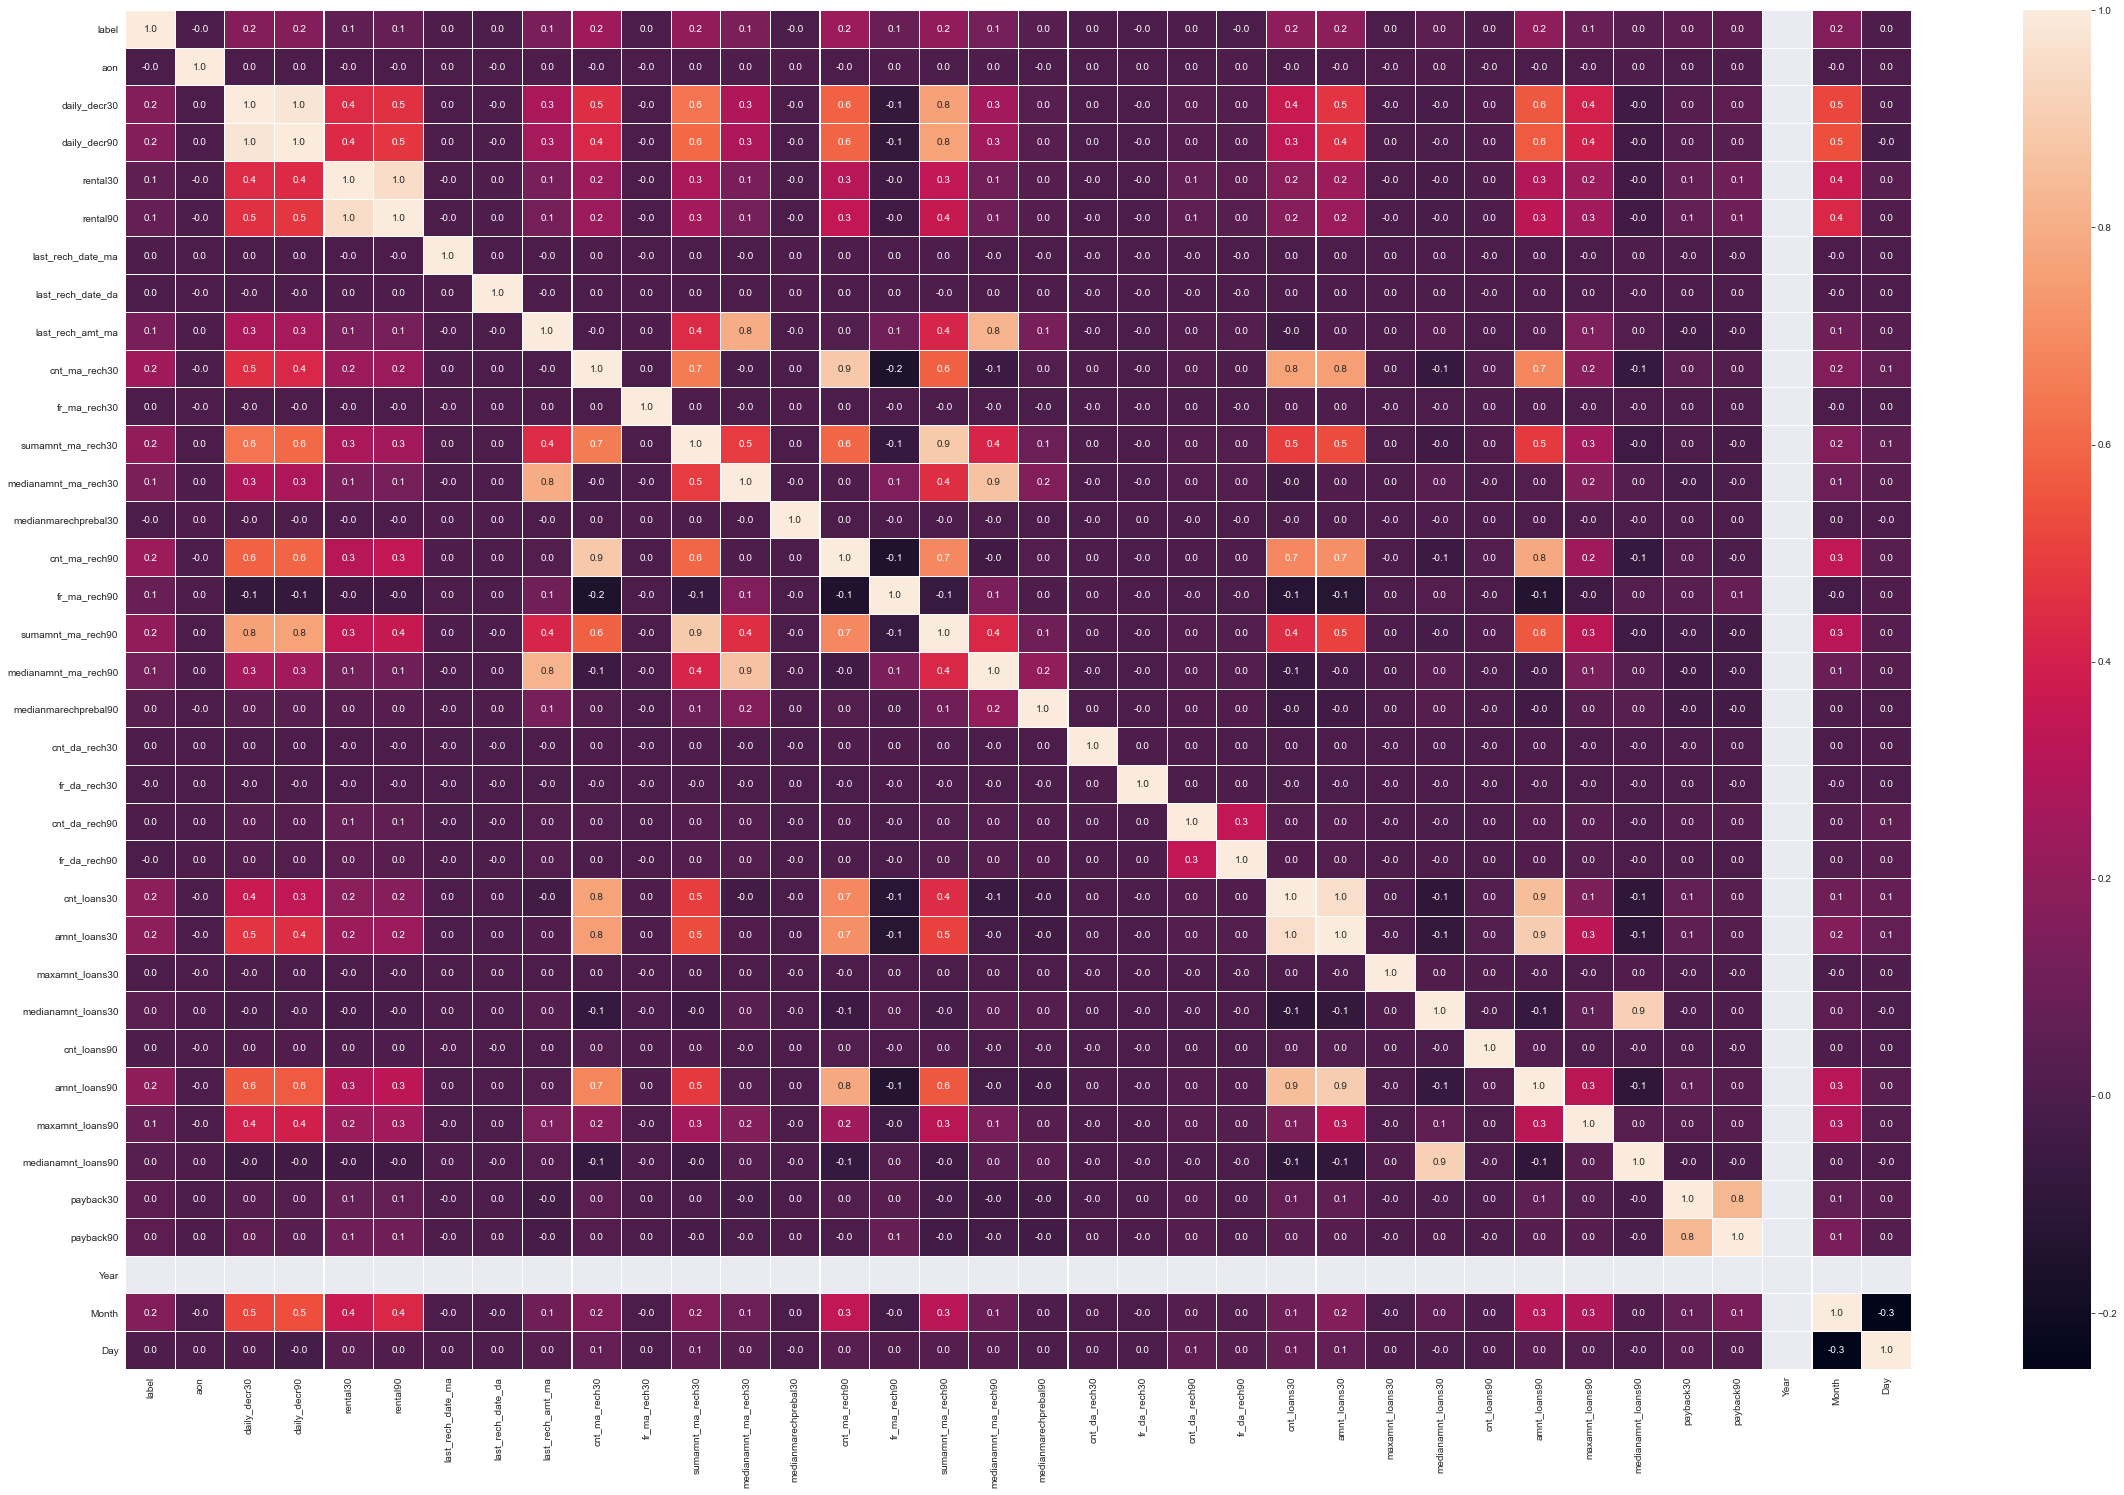

In [68]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Removing Outliers

In [69]:
# making a dataframe of continuous features 
df_con = df.drop(columns = ['label', 'Day', 'Month', 'Year'])

In [70]:
df_con.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

In [71]:
df_con.min()

aon                       -48.000000
daily_decr30              -93.012667
daily_decr90              -93.012667
rental30               -23737.140000
rental90               -24720.580000
last_rech_date_ma         -29.000000
last_rech_date_da         -29.000000
last_rech_amt_ma            0.000000
cnt_ma_rech30               0.000000
fr_ma_rech30                0.000000
sumamnt_ma_rech30           0.000000
medianamnt_ma_rech30        0.000000
medianmarechprebal30     -200.000000
cnt_ma_rech90               0.000000
fr_ma_rech90                0.000000
sumamnt_ma_rech90           0.000000
medianamnt_ma_rech90        0.000000
medianmarechprebal90     -200.000000
cnt_da_rech30               0.000000
fr_da_rech30                0.000000
cnt_da_rech90               0.000000
fr_da_rech90                0.000000
cnt_loans30                 0.000000
amnt_loans30                0.000000
maxamnt_loans30             0.000000
medianamnt_loans30          0.000000
cnt_loans90                 0.000000
a

In [72]:
df_con.max()

aon                     999860.755168
daily_decr30            265926.000000
daily_decr90            320630.000000
rental30                198926.110000
rental90                200148.110000
last_rech_date_ma       998650.377733
last_rech_date_da       999171.809410
last_rech_amt_ma         55000.000000
cnt_ma_rech30              203.000000
fr_ma_rech30            999606.368132
sumamnt_ma_rech30       810096.000000
medianamnt_ma_rech30     55000.000000
medianmarechprebal30    999479.419319
cnt_ma_rech90              336.000000
fr_ma_rech90                88.000000
sumamnt_ma_rech90       953036.000000
medianamnt_ma_rech90     55000.000000
medianmarechprebal90     41456.500000
cnt_da_rech30            99914.441420
fr_da_rech30            999809.240107
cnt_da_rech90               38.000000
fr_da_rech90                64.000000
cnt_loans30                 50.000000
amnt_loans30               306.000000
maxamnt_loans30          99864.560864
medianamnt_loans30           3.000000
cnt_loans90 

# Removing skewness Using yeo-johnson method because 0 is is in many columns.

In [73]:
from sklearn.preprocessing import power_transform

In [74]:
new_df = power_transform(df_con, method = 'yeo-johnson')

In [75]:
# making data frame of transformed data having column name same as it was before.
new_df = pd.DataFrame(new_df, columns = df_con.columns)
df_con = new_df
df_con

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,...,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,...,1.570451,1.454951,-0.101998,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,...,0.556347,0.393236,-0.101998,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,...,0.924658,1.454951,1.182431,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,...,0.011773,0.393236,1.182431,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831


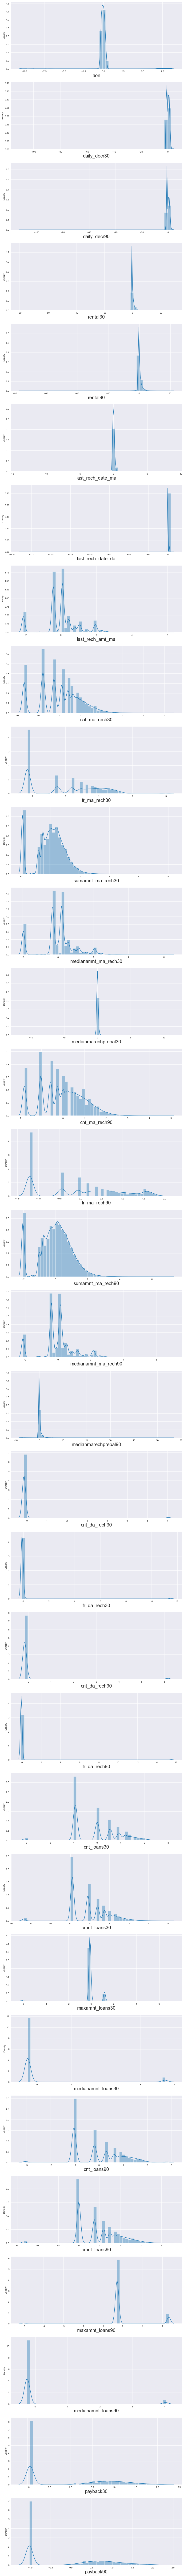

In [76]:
plt.figure(figsize = (13,200))
plotnumber = 1

for columns in df_con:
    if plotnumber <= 32:
        ax = plt.subplot(32,1, plotnumber)
        sns.distplot(df_con[columns])
        plt.xlabel(columns, fontsize = 20)

    plotnumber+=1
plt.show()

We have successfully applied the power_transform to remove the skewness & in many of columns it worked significantly & reduced the skewness but not all column has got sorted because of nature of those column's data distribution which we had discussed earlier. Although we will consider this process & we'll move ahead towards the model building from here.

In [77]:
#adding four columns into data set back
df_con['Day'] = df['Day']
df_con['Month'] = df['Month']
df_con['Year'] = df['Year']
df_con['label'] = df['label']
df = df_con

In [78]:
df

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year,label
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,...,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,20,7,2016,0
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,...,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,10,8,2016,1
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,...,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,19,8,2016,1
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,...,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,6,6,2016,1
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,...,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,22,6,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,...,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305,17,6,2016,1
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,...,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305,12,6,2016,1
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,...,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939,29,7,2016,1
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,...,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831,25,7,2016,1


# Scaling:

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### splitting the data into features and label

In [80]:
X = df.drop(columns = ['label'])
y = df['label']

In [81]:
# scaling the data witn MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

We have done with the standardize the data, but it did not do any changes in the data set because we already had transformed our data set by power_transform method to remove skewness. All right so from here we will go for model building, first we will find the best random state for logistic regression and after finding the best randome state we will split the data into training data & testing data to train the model in different algorithms & to test the trained model

# Principle Component Analysis

In [82]:
from sklearn.decomposition import PCA
pca = PCA()

In [83]:
component = pca.fit_transform(scaled_X)

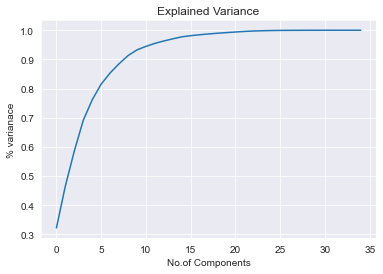

In [84]:
#visualzise
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% varianace')
plt.title('Explained Variance')
plt.show()

In [85]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV,cross_val_score

# Creating Train Test Split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.25, random_state = 77)

# Model Building:

### Logistic Regression

In [87]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [88]:
lr.score(X_train,y_train)

0.879206585493085

In [89]:
pred_lr = lr.predict(X_test)

In [90]:
print('Confusion Matrix for Logistic Regression Model is:\n\n',confusion_matrix(y_test,pred_lr),'\n\n')


print('Accuracy Score for Logistic Regression Model is :', accuracy_score(y_test,pred_lr),'\n\n')


print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test,pred_lr),'\n\n')

Confusion Matrix for Logistic Regression Model is:

 [[  811  5614]
 [  433 45541]] 


Accuracy Score for Logistic Regression Model is : 0.8845970342945476 


Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.65      0.13      0.21      6425
           1       0.89      0.99      0.94     45974

    accuracy                           0.88     52399
   macro avg       0.77      0.56      0.57     52399
weighted avg       0.86      0.88      0.85     52399
 




### KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
knn.score(X_train,y_train)

0.9228278433019071

In [93]:
pred_knn = knn.predict(X_test)

In [94]:
print('Confusion Matrix for Logistic Regression Model is:\n\n',confusion_matrix(y_test,pred_knn),'\n\n')


print('Accuracy Score for Logistic Regression Model is :', accuracy_score(y_test,pred_knn),'\n\n')


print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test,pred_knn),'\n\n')

Confusion Matrix for Logistic Regression Model is:

 [[ 2955  3470]
 [ 1778 44196]] 


Accuracy Score for Logistic Regression Model is : 0.899845416897269 


Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.62      0.46      0.53      6425
           1       0.93      0.96      0.94     45974

    accuracy                           0.90     52399
   macro avg       0.78      0.71      0.74     52399
weighted avg       0.89      0.90      0.89     52399
 




### RandomForestClassifier

In [95]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
rf.score(X_train,y_train)

0.9999872768680739

In [97]:
pred_rf = rf.predict(X_test)

In [98]:
print('Confusion Matrix for Logistic Regression Model is:\n\n',confusion_matrix(y_test,pred_rf),'\n\n')


print('Accuracy Score for Logistic Regression Model is :', accuracy_score(y_test,pred_rf),'\n\n')


print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test,pred_rf),'\n\n')

Confusion Matrix for Logistic Regression Model is:

 [[ 3345  3080]
 [  997 44977]] 


Accuracy Score for Logistic Regression Model is : 0.9221931716254127 


Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.77      0.52      0.62      6425
           1       0.94      0.98      0.96     45974

    accuracy                           0.92     52399
   macro avg       0.85      0.75      0.79     52399
weighted avg       0.92      0.92      0.92     52399
 




### DecisionTreeClassifier

In [99]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
dtc.score(X_train,y_train)

0.9999936384340369

In [101]:
pred_dtc = dtc.predict(X_test)

In [102]:
print('Confusion Matrix for Logistic Regression Model is:\n\n',confusion_matrix(y_test,pred_dtc),'\n\n')


print('Accuracy Score for Logistic Regression Model is :', accuracy_score(y_test,pred_dtc),'\n\n')


print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test,pred_dtc),'\n\n')

Confusion Matrix for Logistic Regression Model is:

 [[ 3621  2804]
 [ 3281 42693]] 


Accuracy Score for Logistic Regression Model is : 0.8838718296150689 


Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.52      0.56      0.54      6425
           1       0.94      0.93      0.93     45974

    accuracy                           0.88     52399
   macro avg       0.73      0.75      0.74     52399
weighted avg       0.89      0.88      0.89     52399
 




### Support Vector Machine

In [103]:
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [104]:
sv.score(X_train,y_train)

0.8870631194574856

In [105]:
pred_sv = sv.predict(X_test)

In [106]:
print('Confusion Matrix for Logistic Regression Model is:\n\n',confusion_matrix(y_test,pred_sv),'\n\n')


print('Accuracy Score for Logistic Regression Model is :', accuracy_score(y_test,pred_sv),'\n\n')


print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test,pred_sv),'\n\n')

Confusion Matrix for Logistic Regression Model is:

 [[ 1695  4730]
 [  916 45058]] 


Accuracy Score for Logistic Regression Model is : 0.892249852096414 


Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.65      0.26      0.38      6425
           1       0.90      0.98      0.94     45974

    accuracy                           0.89     52399
   macro avg       0.78      0.62      0.66     52399
weighted avg       0.87      0.89      0.87     52399
 




# Cross Validations

##### LogisticRegression:

In [107]:
print(cross_val_score(lr,scaled_X,y,cv=5).mean())

0.8807355220741394


##### KNeighborsClassifier

In [108]:
print(cross_val_score(knn,scaled_X,y,cv=5).mean())

0.897988014120339


##### RandomForestClassifier

In [109]:
print(cross_val_score(rf,scaled_X,y,cv=5).mean())

0.9212187462596262


##### DecisionTreeClassifier

In [110]:
print(cross_val_score(dtc,scaled_X,y,cv=5).mean())

0.8841469022614268


##### Support Vector Machine

In [111]:
print(cross_val_score(sv,scaled_X,y,cv=5).mean())

0.8887462922129348


### We can seen that Decision Tree model's cross validation accuracy has given greater accuracy than default model accuracy & After that Random Forest Model has very least difference between model's default accuracy & cross validation accuracy. So from here we have concluded that we have 2 best models for Micro credit Defaulter

# Random Forest Model is best fitting model 

# Hyper Parameter Tuning:

## RandomForestClassifier

In [113]:
RFC = RandomForestClassifier()

In [115]:
parametrs = {'max_depth':[2,4,6,8],'max_features':['auto','sqrt'],'n_estimators':[10,20,30,40,50,60,70,80,90,100],'criterion' :['gini','entropy']}

In [116]:
rfc = GridSearchCV(RFC, parametrs, cv=5)

In [117]:
rfc.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [118]:
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [120]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = 8, max_features = 'sqrt')
model.fit(X_train,y_train)
pred_rf = model.predict(X_test)
print('Confusion Matrix for Logistic Regression Model is:\n\n',confusion_matrix(y_test,pred_rf),'\n\n')


print('Accuracy Score for Logistic Regression Model is :', accuracy_score(y_test,pred_rf),'\n\n')


print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test,pred_rf),'\n\n')

Confusion Matrix for Logistic Regression Model is:

 [[ 2204  4221]
 [  408 45566]] 


Accuracy Score for Logistic Regression Model is : 0.9116586194393023 


Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.84      0.34      0.49      6425
           1       0.92      0.99      0.95     45974

    accuracy                           0.91     52399
   macro avg       0.88      0.67      0.72     52399
weighted avg       0.91      0.91      0.89     52399
 




# AUC-ROC Curve

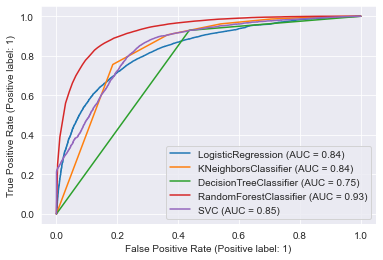

In [125]:
disp = plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(knn, X_test, y_test, ax = disp.ax_)
plot_roc_curve(dtc, X_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, X_test, y_test, ax = disp.ax_)
plot_roc_curve(sv, X_test, y_test, ax = disp.ax_)
plt.show()

## From above ROC plot we can see that Random Forest Model has the highest area under the curve.

# Model Saving

In [130]:
import pickle

In [134]:
modelname = 'Micro Credit Defaulter Project'
pickle.dump(RFC, open(model_name, 'wb'))

In [136]:
modelname

'Micro Credit Defaulter Project'